In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

Part 1

In [2]:
df = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/Term 2/MBAN 6120/Assignment1/train.csv', delimiter=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#Identify the features' characteristcs.
unique_counts = df.nunique()
print(unique_counts)

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [9]:
##Feature Engineering// Dummies
y_mapping = {'no':0, 'yes':1}
df['y'] = df['y'].map(y_mapping)

Summarize findings:
Those features are necessary to consider if we want to predict whether the client subscribed a term deposit; therefore, I decided to keep all variables to predict target variable "y". Furthremore, I did data cleanning and dummies to ensure that I can go to the next step.

In [10]:
#Setting X and Y to 
y = df['y']
X = df.drop('y', axis=1)

In [11]:
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64']).columns
categorical_fetures = X.select_dtypes(include=['object']).columns


In [12]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_fetures)])

Explanation: According to the information of dataset, I found there are only two types of data in this dataset, so I set numerical and categorical features to ensure X can be run at prediction models. Also, I used ColumnTransformer to process data in different columns. StandardScaler is for standardizing numerical features to have a mean of 0 and a standard deviation of 1. OneHotEncoder is convert the types of categorical features to one hot encoding.

Part 2

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.fit_transform(X_test)

In [16]:
#Set up KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_transformed, y_train)
y_pred_knn = knn.predict(X_test_transformed)
y_pred_prob_knn = knn.predict_proba(X_test_transformed)[:,1]

In [17]:
#F1-Score, Accuracy, Precision, and Recall
print("f1_score: ", f1_score(y_pred_knn, y_test))
print("Accuracy: ", accuracy_score(y_pred_knn,y_test))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))

f1_score:  0.3726287262872629
Accuracy:  0.8976003538648678
Precision:  0.6563245823389021
Recall:  0.26017029328287605


In [18]:
#ConfusionMatrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Confusion Matrix:
 [[7842  144]
 [ 782  275]]


ROC AUC SCORE:  0.8662436344966037


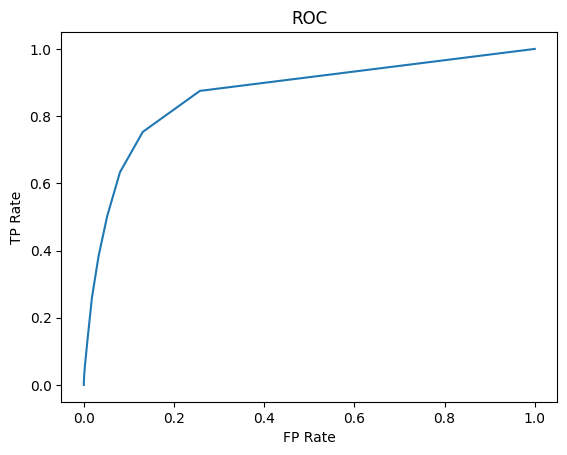

In [20]:
#Score of ROC AUC
print("ROC AUC SCORE: ", roc_auc_score(y_test, y_pred_prob_knn))
#ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
plt.figure()
plt.plot(fpr,tpr,label = 'ROC curve' % roc_auc_score(y_test, y_pred_prob_knn))
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

In [21]:
#Set up KNN model
log_reg = LogisticRegression()
log_reg.fit(X_train_transformed, y_train)
y_pred_logr = knn.predict(X_test_transformed)
y_pred_prob_logr = knn.predict_proba(X_test_transformed)[:,1]

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#F1-Score, Accuracy, Precision, and Recall
print("f1_score: ", f1_score(y_pred_logr, y_test))
print("Accuracy: ", accuracy_score(y_pred_logr,y_test))
print("Precision: ", precision_score(y_test, y_pred_logr))
print("Recall: ", recall_score(y_test, y_pred_logr))

f1_score:  0.3726287262872629
Accuracy:  0.8976003538648678
Precision:  0.6563245823389021
Recall:  0.26017029328287605


In [23]:
#ConfusionMatrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logr))

Confusion Matrix:
 [[7842  144]
 [ 782  275]]


ROC AUC SCORE:  0.8662436344966037


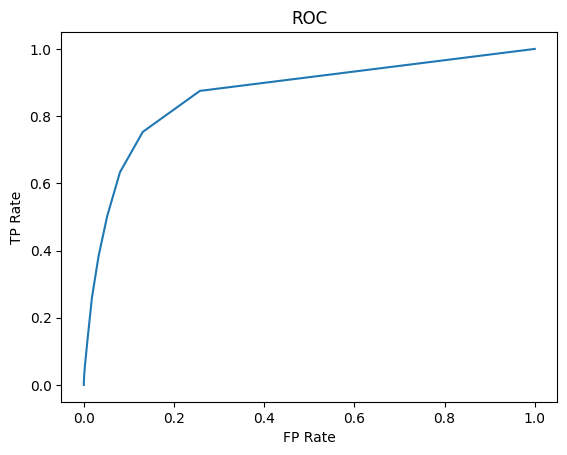

In [25]:
#Score of ROC AUC
print("ROC AUC SCORE: ", roc_auc_score(y_test, y_pred_prob_logr))
#ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logr)
plt.figure()
plt.plot(fpr,tpr,label = 'ROC curve' % roc_auc_score(y_test, y_pred_prob_logr))
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

Based on evaluation of KNN and Logistic Regression models, both of them perform well.

Part 3

In [26]:
rf = RandomForestClassifier()

#Tune Hyperparameters
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [0,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid_search = GridSearchCV(rf,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_transformed, y_train)

#Using the best hyperparameters to build RF model
rf_best = grid_search.best_estimator_

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 600, in _va

In [27]:
ada = AdaBoostClassifier()

#Tune Hyperparameters
param_grid_ada = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01,0.05,0.1,0.5,1]
}

grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train_transformed, y_train)

#Using the best hyperparameters to build ADABoost model
ada_best = grid_search_ada.best_estimator_

In [28]:
from sklearn.tree import DecisionTreeClassifier

#Tune Hyperparameters
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier())
param_grid_bag = {
    'n_estimators':[10,50,100],
    'max_samples': [0.5,1],
    'max_features': [0.5,1]
}

grid_search_bag = GridSearchCV(bag,param_grid_bag, cv=5, scoring='accuracy')
grid_search_bag.fit(X_train_transformed,y_train)

bag_best = grid_search_bag.best_estimator_

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` wa

In [29]:
voting_hard = VotingClassifier(estimators = [
    ('lr',log_reg),
    ('knn',knn),
    ('rf',rf_best)
], voting='hard')

voting_hard.fit(X_train_transformed,y_train)

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     min_samples_split=5,
                                                     n_estimators=200))])

In [30]:
voting_soft = VotingClassifier(estimators = [
    ('lr',log_reg),
    ('knn',knn),
    ('rf',rf_best)
], voting='soft')

voting_soft.fit(X_train_transformed,y_train)

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     min_samples_split=5,
                                                     n_estimators=200))],
                 voting='soft')

In [31]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting_hard': voting_hard,
    'Voting_soft': voting_soft
}

In [32]:
# Create dictionary
results = {}

In [34]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.664399  0.277200  0.391188  0.899149  0.387713
Logistic Regression   0.661458  0.360454  0.466626  0.903682  0.409158
Random Forest         0.673534  0.402081  0.503555  0.907332  2.532625
AdaBoost              0.641322  0.367077  0.466907  0.902024  1.050835
Bagging               0.612299  0.433302  0.507479  0.901692  1.518088
Voting_hard           0.707843  0.341533  0.460753  0.906558  5.904744
Voting_soft           0.700000  0.364238  0.479154  0.907442  5.727259


Part 5 
Question 1:
Why did the ensemble models perform the way they did?

Answer:
Ensemble models combine several single prediction models; in this way, it can reduce bias and optimize overfitting. When each prediction model has their own pros and cons; for example, Adaboost can review misclassified samples and make them better, ensemble models can combine weak and strong classifiers to become the more powerful model.

Firstly, random forest classifier reduce the overfitting through random choosing the data and features.
Secondly, Adaboost and bagging are lower than Random Forest because adaboost is very sensitive, and it might focus on outliers in the dataset. As for bagging, if there are too many features we chose to predict, it might be not be perform as well as Random Forest because its lack of random selection.
Lastly, hard voting chose the most "vote" classifier to be its final prediction; on the other hand, soft voting is chosed the classifier based on the most average "vote". Soft voting will avoid the imbalance issue happening if some prediction is inaccurate. 

Question 2:
If you had to pick one model to implement in business process, which would it be and why?

Answer:
- KNN has the lowest recall which means that False Negative might have much , and its precision perform well. Another worth point is compute time is the fastest; however, its f1-score and accuracy are also the lowest in these models. It would not be the best choice.
- As for Logistic Regression model, its precision, recall, accuracy, and f1-score are fairly good compared with other models, and it didn't take much time to get the result.
- The overall performance of Random Forest are better than Logistic Regression model, but it would take 2 more second to get the result.
- Adaboost's outperforms are worse than Random Forest, and it need to take around 1 second.
- Bagging got the similar result with Random Forest, but its precision are worse than RF.
- Two voting based model got the best performance of precision, f1-score, accuracy, but they took too much time, it would not be the best model to use.

Based on these analysis of prediction models, Random Forest should be the best one to use. Although it took 2.53 seconds, it is acceptable range of time to use. If the random forest model is used for predicting, it is fast to get the result which can be explainable for the importance of specific features.

Question 3:
What decision criteria did you use to arrive at this conclusion?

Answer:
Based on the concept of Precision-Recall Trade-off. A high precision shows most positive predictions are positive, and the high recall also reveals that most actual positives are positive. High recall can ensure that we didn't miss any positives when we predict.
Computational cost is also what I consider, even though RF took around 2.5 second, it certainly improve the performance of the results. Once it is completely trained, the speed will develop as well.